## Default of credit card clients.
- The dataset can be found here: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients .
- This is a classification problem to deal whether the client is paying the default payment or not.
- There are about 30000 instances with Integers and Object type datatypes across various features.

# Description of the Business Problem/Challenge:
### Motivation:
The challenge at hand revolves around predicting the likelihood of credit card clients defaulting on their payments. This is a critical issue in the banking industry, where understanding and mitigating the risk of defaults is essential for financial stability. Customer defaults can have cascading effects, impacting the profitability and overall health of the financial institution.

### Importance:
Identifying potential defaulters in advance allows for proactive risk management strategies, enabling the implementation of preventive measures such as targeted communication, personalized financial counseling, or adjusting credit limits. This, in turn, can minimize financial losses, maintain customer trust, and contribute to the overall stability of the banking sector.

# How a Data Analysis/Modeling Project May Address this Challenge/Problem:
### Predictive Modeling:
A data analysis/modeling project can leverage historical credit card data to build predictive models that estimate the probability of default for each customer. By employing machine learning algorithms, the project aims to learn patterns and relationships within the data, enabling the identification of key factors influencing default behavior.

### Features Exploration:
Exploring various features such as payment history, credit limit information can provide insights into the drivers of default. Feature engineering can be applied to enhance the model's understanding of the data, contributing to more accurate predictions.

### Model Selection:
The project may involve testing and comparing multiple classification algorithms (e.g., Logistic Regression, Support Vector Machines, Random Forest, Decision Trees, Multilayer Perceptron) to determine which model performs best for this specific credit default prediction task.

# How to Evaluate the Solution:
### Model Evaluation Metrics:
The effectiveness of the solution can be assessed using appropriate evaluation metrics for binary classification, such as accuracy, precision, recall, F1-score, and area under the Receiver Operating Characteristic (ROC) curve. These metrics provide a comprehensive view of the model's performance, balancing aspects like false positives, false negatives, and overall predictive accuracy.

### train test Split:
To ensure the robustness of the models, a cross-validation approach can be employed. This involves splitting the dataset into multiple folds, training the model on different subsets, and evaluating its performance across various validation sets. This helps in detecting overfitting and ensures that the model generalizes well to unseen data.

### Business Impact:
Ultimately, the success of the solution is measured by its impact on the business. Reduction in the number of false positives (misclassifying non-defaulters as defaulters) and false negatives (missing actual defaulters) is crucial for practical implementation. The model should contribute to a significant reduction in financial losses due to defaults and improve the overall risk management strategy of the banking institution. Ongoing monitoring and refinement of the model based on new data will be essential for its sustained effectiveness.

## Problem Statement

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among five data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable. It is important for the people in banking industry to find out if a customer can default or not in the coming months.

This project provides a high level overview of predicting whether customer can default or not. It is a binary classification problem.

### Structure of the Notebook

These are the steps our team performed to predict the default of the customer.

1. Start Spark Session
2. Using spark sql to store the data in the Warehouse.
3. Querying the data stored in warehouse
4. Loading the data using python Pandas.
5. Data Preprocessing- Data cleaning, Outiler elimination
6. Data Exploration -Plots
7. Feature Engineering
8. Dealing with Unbalanced Target class - SMOTE
9. Train test split
10. Machine Learning Models


### * Note: See in the end of the notebook to find out the what is the purpose of each step

### Initializing and Starting Pyspark Session

In [1]:
from pyspark.sql import SparkSession;
from pyspark.context import SparkContext;

# warehouse_location points to the default location for managed databases and tables
from os.path import abspath
warehouse_location = abspath('spark-warehouse')

spark = SparkSession \
    . builder \
    .master("local[*]") \
    .appName("ISM6562 Final_Project") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .enableHiveSupport() \
    .getOrCreate()

sc =spark.sparkContext
sc.setLogLevel("ERROR") # only display errors (not warnings)

# note: If you have multiple spark sessions running (like from a previous notebook you've run), 
# this spark session webUI will be on a different port than the default (4040). One way to 
# identify this part is with the following line. If there was only one spark session running, 
# this will be 4040. If it's higher, it means there are still other spark sesssions still running.
spark_session_port = spark.sparkContext.uiWebUrl.split(":")[-1]
print("Spark Session WebUI Port: " + spark_session_port)

23/11/10 18:04:29 WARN Utils: Your hostname, localhost.localdomain resolves to a loopback address: 127.0.0.1; using 10.21.10.132 instead (on interface eth0)
23/11/10 18:04:29 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/10 18:04:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark Session WebUI Port: 4040


In [2]:
spark

### Importing Libraries and reading csv files

In [3]:
import pandas as pd

## Importing the data.

In [5]:
df = pd.read_csv("data/Credit_Card_Default.csv")
#df = pd.read_excel('./card_default.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Create dataframe in Spark

In [6]:
df_spark = spark.createDataFrame(df)
df_spark.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

In [7]:
df_spark.printSchema()

root
 |-- ID: long (nullable = true)
 |-- LIMIT_BAL: long (nullable = true)
 |-- SEX: long (nullable = true)
 |-- EDUCATION: long (nullable = true)
 |-- MARRIAGE: long (nullable = true)
 |-- AGE: long (nullable = true)
 |-- PAY_0: long (nullable = true)
 |-- PAY_2: long (nullable = true)
 |-- PAY_3: long (nullable = true)
 |-- PAY_4: long (nullable = true)
 |-- PAY_5: long (nullable = true)
 |-- PAY_6: long (nullable = true)
 |-- BILL_AMT1: long (nullable = true)
 |-- BILL_AMT2: long (nullable = true)
 |-- BILL_AMT3: long (nullable = true)
 |-- BILL_AMT4: long (nullable = true)
 |-- BILL_AMT5: long (nullable = true)
 |-- BILL_AMT6: long (nullable = true)
 |-- PAY_AMT1: long (nullable = true)
 |-- PAY_AMT2: long (nullable = true)
 |-- PAY_AMT3: long (nullable = true)
 |-- PAY_AMT4: long (nullable = true)
 |-- PAY_AMT5: long (nullable = true)
 |-- PAY_AMT6: long (nullable = true)
 |-- default payment next month: long (nullable = true)



### Data Description

In [8]:
df2 = df_spark.toPandas()
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Adding Data to the PySpark Datawarehouse

In [9]:
spark.catalog.listTables() # tables already exists in the spark warehouse

[Table(name='fake_friends', catalog='spark_catalog', namespace=['default'], description=None, tableType='MANAGED', isTemporary=False),
 Table(name='movieratings', catalog='spark_catalog', namespace=['default'], description=None, tableType='MANAGED', isTemporary=False),
 Table(name='movies', catalog='spark_catalog', namespace=['default'], description=None, tableType='MANAGED', isTemporary=False)]

In [10]:
db=spark.sql("show databases")
db.show() # shows current databases present in the warehouse. 

+-------------+
|    namespace|
+-------------+
|bd_project_db|
|      default|
|       w10_db|
+-------------+



In [11]:
tables=spark.sql("show tables").show()

+---------+------------+-----------+
|namespace|   tableName|isTemporary|
+---------+------------+-----------+
|  default|fake_friends|      false|
|  default|movieratings|      false|
|  default|      movies|      false|
+---------+------------+-----------+



In [13]:
creditdefault=spark.read.csv("./data/Credit_Card_Default.csv", header=True, inferSchema=True);
creditdefault.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

In [15]:
creditdefault.createOrReplaceTempView("credit_tmp_view")

In [16]:
# Get 5 rows using temp view created.
q1=spark.sql("SELECT * FROM credit_tmp_view;")
q1.show(5)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

In [17]:
# list the tables present in the warehouse
tables=spark.sql("show tables").show()

+---------+---------------+-----------+
|namespace|      tableName|isTemporary|
+---------+---------------+-----------+
|  default|   fake_friends|      false|
|  default|   movieratings|      false|
|  default|         movies|      false|
|         |credit_tmp_view|       true|
+---------+---------------+-----------+



In [18]:
type(creditdefault)

pyspark.sql.dataframe.DataFrame

In [19]:
# add the credit data to the database in warehouse, after creating a new database named "BD_Project_DB"

spark.sql("CREATE DATABASE IF NOT EXISTS bd_project_db;")

DataFrame[]

In [20]:
creditdefault.write.mode("overwrite").saveAsTable("bd_project_db.creditdefault")

### Perform SQL Operation to list and get the first 5 rows from the warehouse

In [21]:
spark.catalog.listTables("bd_project_db")

[Table(name='creditdefault', catalog='spark_catalog', namespace=['bd_project_db'], description=None, tableType='MANAGED', isTemporary=False),
 Table(name='credit_tmp_view', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [22]:
q2=spark.sql("SELECT * FROM bd_project_db.creditdefault;").show(5)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

## Data Preprocessing

### Data Cleaning

In [23]:
creditdefault.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- default payment next month: inte

In [24]:
df=creditdefault

In [25]:
from pyspark.sql.functions import when

# Gender (SEX) mapping
gender_mapping = {1: "male", 2: "female"}
df = df.withColumn("SEX", when(df["SEX"] == 1, "male").otherwise("female"))

# Education (EDUCATION) mapping
education_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others",
    5: "unknown",
    6: "unknown"
}
df = df.withColumn("EDUCATION", when(df["EDUCATION"] == 1, "graduate school").when(df["EDUCATION"] == 2, "university").when(df["EDUCATION"] == 3, "high school").when(df["EDUCATION"] == 4, "others").when(df["EDUCATION"] == 5, "unknown").when(df["EDUCATION"] == 6, "unknown").otherwise("unknown"))

# Marriage (MARRIAGE) mapping
marriage_mapping = {1: "married", 2: "single", 3: "others"}
df = df.withColumn("MARRIAGE", when(df["MARRIAGE"] == 1, "married").when(df["MARRIAGE"] == 2, "single").otherwise("others"))

In [26]:
df.toPandas().head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
# Rename columns PAY_0 to PAY_1 and default payment next month to def_pay
# We can also use 'df.selectExpr' 

df = df.withColumnRenamed('PAY_0', 'PAY_1').withColumnRenamed('default payment next month', 'def_pay')
df.toPandas().head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
type(df)

pyspark.sql.dataframe.DataFrame

In [29]:
from pyspark.sql.functions import col,isnan, when, count

# Check for null values in each column
null_counts = df.select([count(when(isnan(c), c)).alias(c) for c in df.columns])

# Show the counts of null values in each column
null_counts.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|def_pay|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|  0|        0|  0|        0|       0|  0|    0|    0|    0|    0|    0|    0|        0|        0|        0|        0|        0|        0|       0|       0|       0|       0|       0|       0|      0|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+----

### Data Exploration

In [30]:
# For the 'SEX' column
sex_counts = df.groupBy("SEX").count()
sex_counts.show()

# For the 'MARRIAGE' column
marriage_counts = df.groupBy("MARRIAGE").count()
marriage_counts.show()

# For the 'EDUCATION' column
education_counts = df.groupBy("EDUCATION").count()
education_counts.show()

+------+-----+
|   SEX|count|
+------+-----+
|female|18112|
|  male|11888|
+------+-----+

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|  others|  377|
| married|13659|
|  single|15964|
+--------+-----+

+---------------+-----+
|      EDUCATION|count|
+---------------+-----+
|     university|14030|
|        unknown|  345|
|         others|  123|
|graduate school|10585|
|    high school| 4917|
+---------------+-----+



In [31]:
#pip install matplotlib

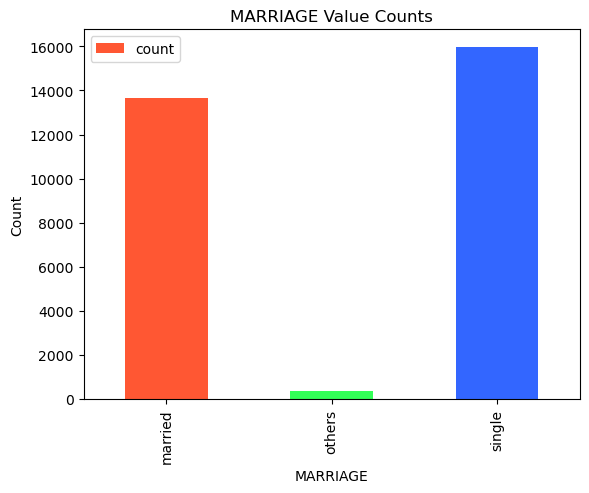

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of unique values in the 'MARRIAGE' column
marriage_counts = df.groupBy("MARRIAGE").count().orderBy("MARRIAGE")

# Convert the result to a Pandas DataFrame for plotting
marriage_counts_df = marriage_counts.toPandas()

# Define a custom color palette for the bars
colors = ['#FF5733', '#33FF57', '#3366FF']

# Create a bar plot with custom colors
marriage_counts_df.plot(kind='bar', x='MARRIAGE', y='count', color=colors)
plt.xlabel('MARRIAGE')
plt.ylabel('Count')
plt.title('MARRIAGE Value Counts')
plt.show()

The bar chart above represent the count of individuals by their marital status categorized into three groups: "married", "others", and "single". Here's an analysis of the data as shown in the chart:

Married: This category has the second-highest count, indicated by the red bar. The height of the bar suggests a significant number of individuals fall into this category.

Others: This group has the smallest count, represented by the green bar. It's much smaller compared to the other categories, indicating that few individuals are classified under "others". This category may include divorced, widowed, or separated individuals, depending on how the data was categorized.

Single: The blue bar indicates the "single" category, which has the highest count among the three. This suggests that the majority of individuals in the dataset are single.

#### From the use of the groupBy and count functions to group the results by count and the orderBy function is used to sort the results by the "MARRIAGE" category.

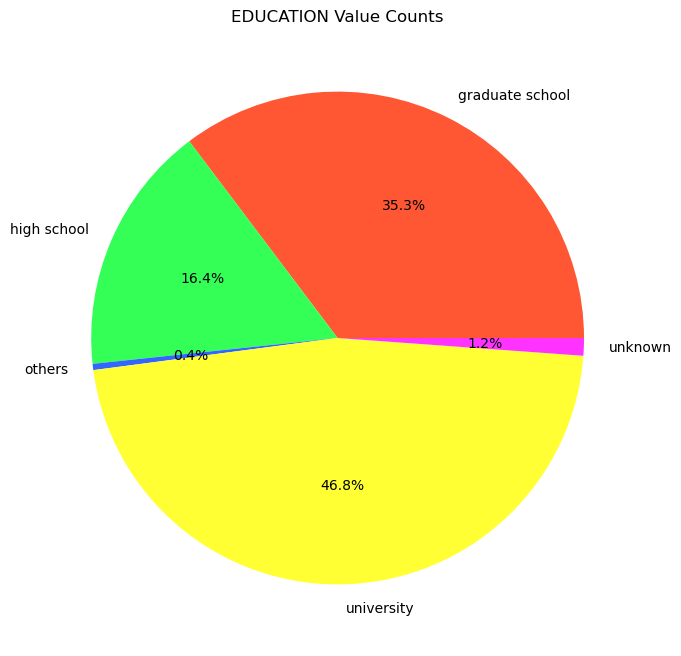

In [33]:
education_counts = df.groupBy('EDUCATION').count().orderBy('EDUCATION')

# Convert the result to a Pandas DataFrame for plotting
education_counts_df = education_counts.toPandas()

education_colors = ['#FF5733', '#33FF57', '#3366FF', '#FFFF33', '#FF33FF', '#33FFFF']

# Create a pie chart for 'EDUCATION' with custom colors
plt.figure(figsize=(8, 8))
plt.pie(education_counts_df['count'], labels=education_counts_df['EDUCATION'], autopct='%1.1f%%', colors=education_colors)
plt.title('EDUCATION Value Counts')
plt.show()

The pie chart visualizes the distribution of education levels within a dataset. The chart is divided into segments that represent different education categories, each denoted by a unique color and a corresponding percentage value:

Graduate School: This is the largest segment, occupying 35.3% of the chart, represented in red. It indicates that over a third of the individuals in the dataset have education at the graduate school level.

University: The yellow segment represents those with a university level education, which accounts for 46.8% of the dataset, making it the majority category.

High School: The green segment shows that 16.4% of individuals have education up to the high school level.

Unknown: A small purple segment accounting for 1.2% suggests that the education level of these individuals is not known.

Others: The smallest slice, in blue, represents other education categories not specified, comprising just 0.4% of the dataset.

The percentages indicate the relative frequency of each education level within the data.

#### Code Explantion:
df.groupBy('EDUCATION').count().orderBy('EDUCATION'): This line groups the dataset by the 'EDUCATION' column, counts the number of occurrences of each unique education level, and then orders the result by the 'EDUCATION' column.

education_counts.toPandas(): This converts the result of the grouping and counting from a Spark DataFrame into a Pandas DataFrame, which is often easier to work with for plotting purposes in Python.

education_colors: A list of hex color codes that specify the colors to be used for each segment of the pie chart.

The plt.figure(figsize=(8, 8)) command sets the size of the figure to be an 8 by 8-inch square.

plt.pie(...): This creates the pie chart with the counts of each education level, uses the specified colors, labels each segment with the name of the education level, and displays the percentage of the total for each segment.

plt.title('EDUCATION Value Counts'): Sets the title of the pie chart.

plt.show(): Displays the plot.

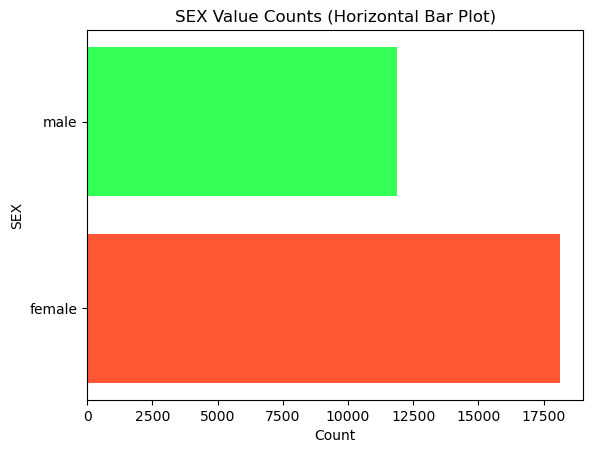

In [34]:
# Count the occurrences of unique values in the 'SEX' column
sex_counts = df.groupBy("SEX").count().orderBy("SEX")

# Convert the result to a Pandas DataFrame for plotting
sex_counts_df = sex_counts.toPandas()

# Define custom colors for the horizontal bar plot
colors = ['#FF5733', '#33FF57']

# Create a horizontal bar plot for 'SEX' with custom colors
plt.barh(sex_counts_df['SEX'], sex_counts_df['count'], color=colors)
plt.ylabel('SEX')
plt.xlabel('Count')
plt.title('SEX Value Counts (Horizontal Bar Plot)')
plt.show()

The horizontal bar chart above shows the count of individuals by sex, with two categories represented: "male" and "female". Here's an analysis of the visualization:

The green bar represents males. The length of the bar indicates the count of males in the dataset, which appears to be around 15,000.

The red bar represents females. The count for females is slightly less than that of males, hovering just below the 15,000 mark.

The title "SEX Value Counts (Horizontal Bar Plot)" suggests that the chart is displaying the distribution of sexes in the dataset.

#### Code Explantion
df.groupBy("SEX").count().orderBy("SEX"): This line groups the data by the "SEX" column, counts the occurrences of each unique value (likely 'male' and 'female'), and sorts the results.

sex_counts.toPandas(): This converts the grouped and sorted data into a Pandas DataFrame, which is necessary for creating plots using Matplotlib in Python.

colors = ['#FF5733', '#33FF57']: A list of hex color codes is defined for use in the bar plot, with the first color likely intended for females and the second for males based on the color of the bars in the chart.

plt.barh(...): Creates a horizontal bar plot using the 'SEX' column for the y-axis labels and the 'count' column for the width of the bars. Custom colors are applied to the bars.

plt.ylabel('SEX') and plt.xlabel('Count'): These lines label the y-axis as "SEX" and the x-axis as "Count", indicating what each axis represents.

plt.title(...): Sets the title of the chart to "SEX Value Counts (Horizontal Bar Plot)".

plt.show(): This command displays the chart.

### Outlier Presence and Elimination

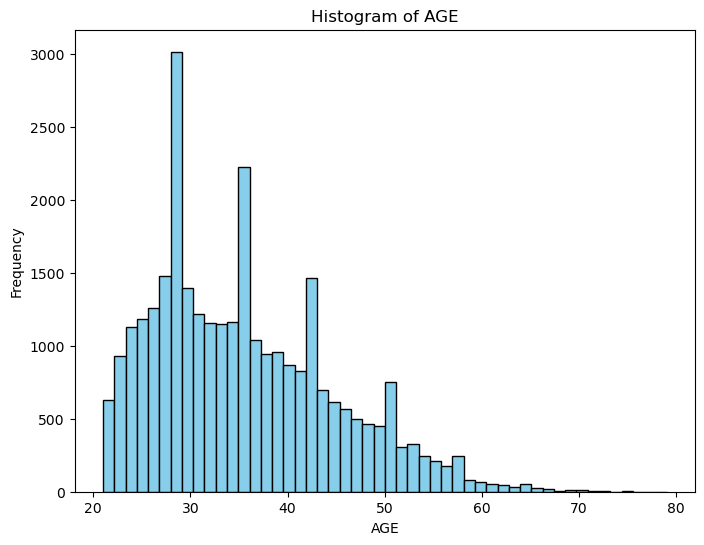

In [35]:
# In this code, we first select the 'AGE' column from your DataFrame and convert it to a Pandas DataFrame. 
# Then, we use Matplotlib to create a histogram of the 'AGE' values.


age_df = df.select("AGE").toPandas()

# Create a histogram using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(age_df['AGE'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Histogram of AGE')
plt.show()

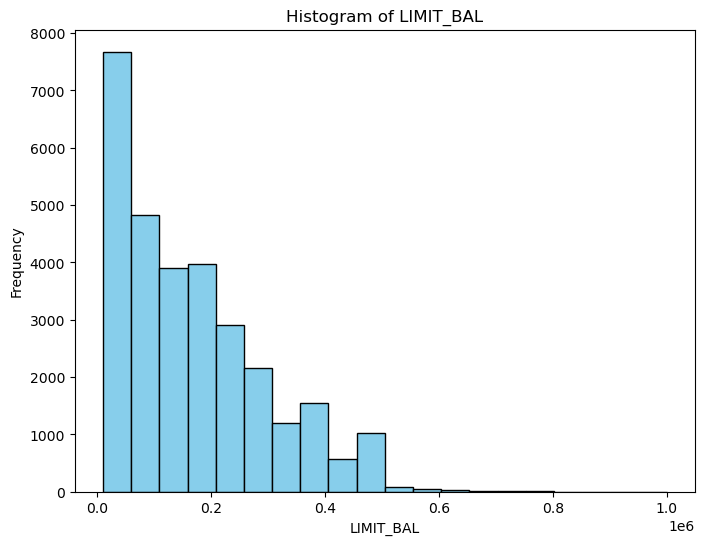

In [36]:
# Select the 'LIMIT_BAL' column and convert it to a Pandas DataFrame
limit_bal_df = df.select('LIMIT_BAL').toPandas()

# Create a histogram using Matplotlib
plt.figure(figsize=(8, 6))
limit_bal_df['LIMIT_BAL'].plot.hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')
plt.title('Histogram of LIMIT_BAL')
plt.show()

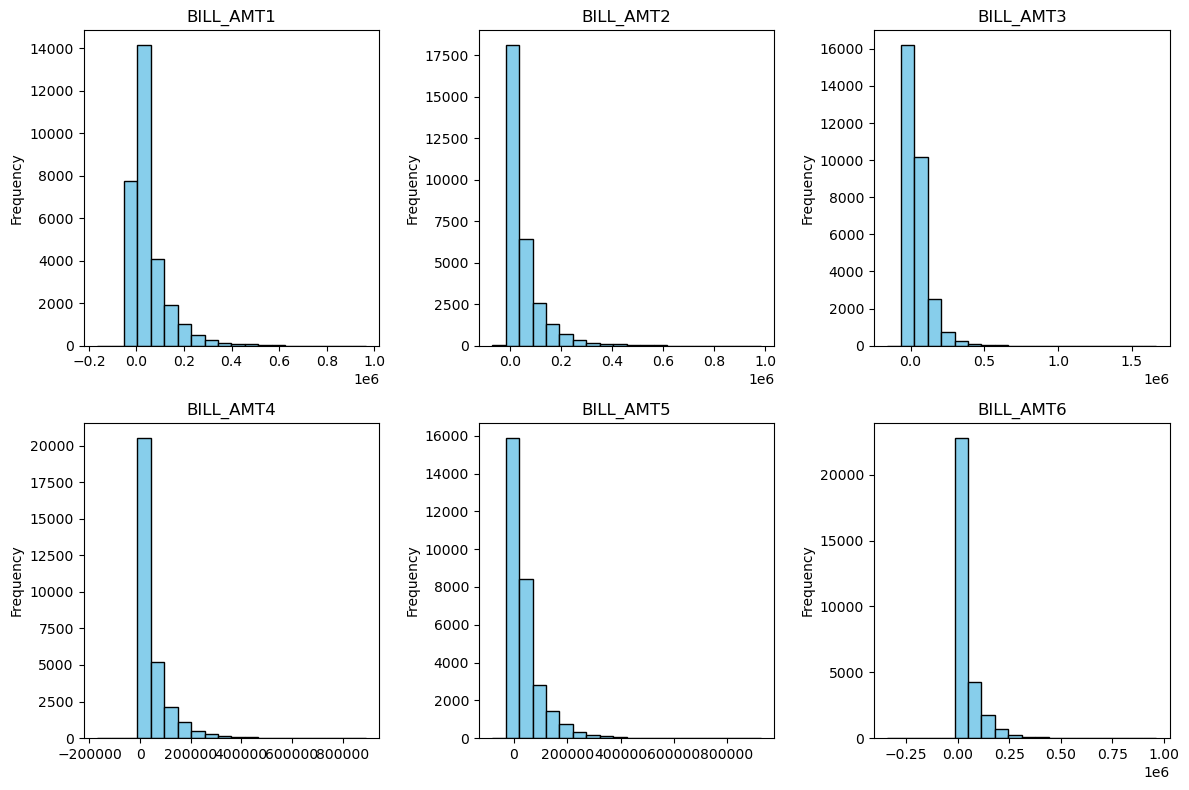

In [37]:
# Histogram plot for Bills amount

def draw_histograms(df, variables, n_rows, n_cols, n_bins, color):
    fig = plt.figure(figsize=(12, 8))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        
        # Select the column from the DataFrame and convert it to a Pandas DataFrame
        var_df = df.select(var_name).toPandas()
        
        # Create a histogram for the selected column
        var_df[var_name].plot.hist(bins=n_bins, color=color, edgecolor='black', ax=ax)
        ax.set_title(var_name)
    
    fig.tight_layout()
    plt.show()

# Select the columns you want to create histograms for
bills = df.select('BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6')

# Specify the number of rows, columns, and bins
draw_histograms(bills, bills.columns, 2, 3, 20, 'skyblue')

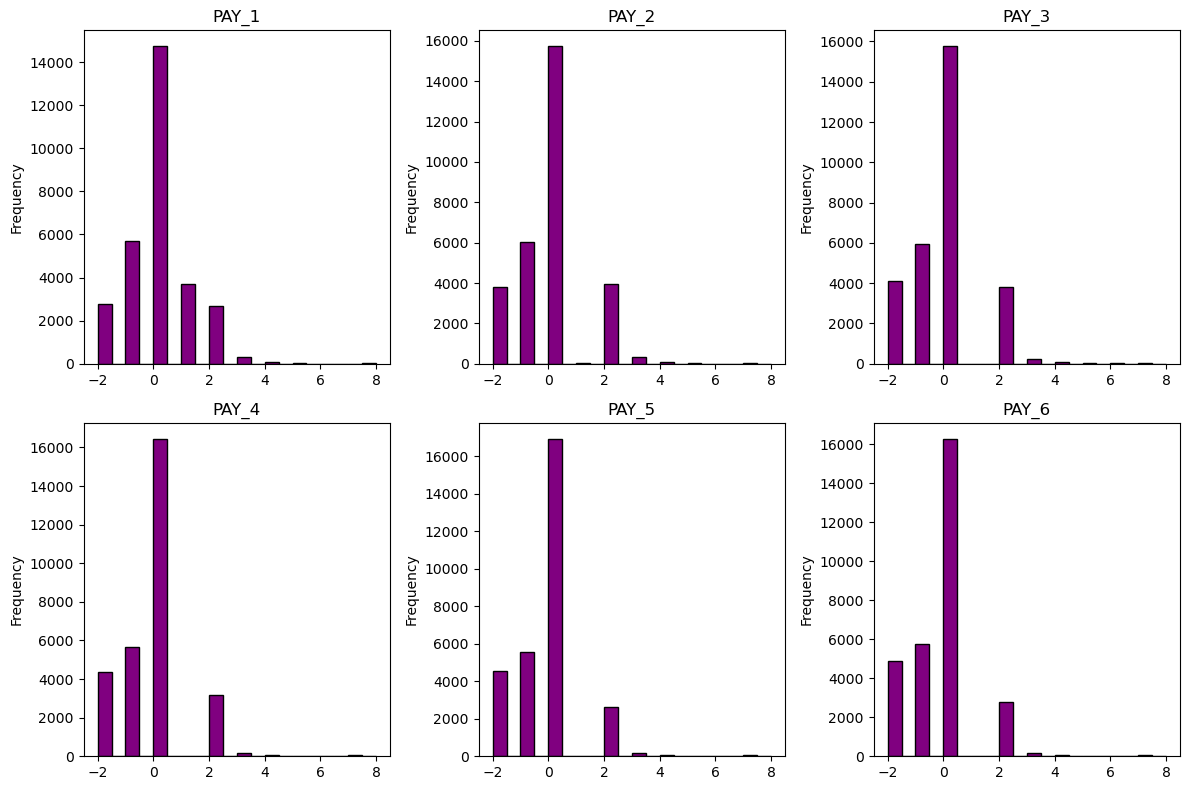

In [38]:
# Histogram plot for repayment amount paid by the each user 

pay_df = df.select('PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6')
draw_histograms(pay_df, pay_df.columns, 2, 3, 20, 'purple')

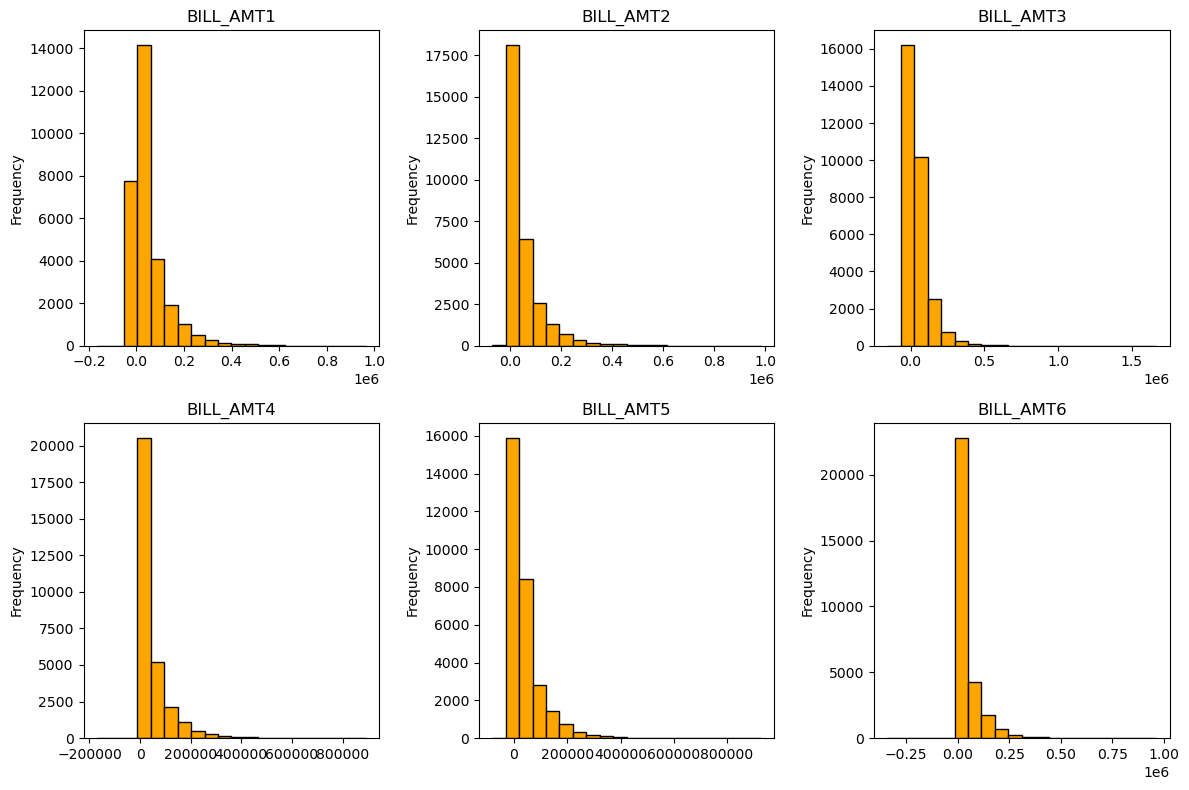

In [39]:
# histogram distribution plot for previous payment

pay_amt_df = df.select('BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6')
draw_histograms(pay_amt_df, pay_amt_df.columns, 2, 3, 20, 'orange')

In [40]:
def calculate_bounds(df):
    bounds = {
        c: dict(
            zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
        )
        for c,d in zip(df.columns, df.dtypes) if d[1] == "int"
    }

    for c in bounds:
        iqr = bounds[c]['q3'] - bounds[c]['q1']
        bounds[c]['min'] = bounds[c]['q1'] - (iqr * 1.5)
        bounds[c]['max'] = bounds[c]['q3'] + (iqr * 1.5)

    return bounds


bounds=calculate_bounds(df)

In [41]:
# Display the calculated bounds
for col, col_bounds in bounds.items():
    print(f"Bounds for {col}: {col_bounds}")

Bounds for ID: {'q1': 7500.0, 'q3': 22500.0, 'min': -15000.0, 'max': 45000.0}
Bounds for LIMIT_BAL: {'q1': 50000.0, 'q3': 240000.0, 'min': -235000.0, 'max': 525000.0}
Bounds for AGE: {'q1': 28.0, 'q3': 41.0, 'min': 8.5, 'max': 60.5}
Bounds for PAY_1: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_2: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_3: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_4: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_5: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_6: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for BILL_AMT1: {'q1': 3558.0, 'q3': 67090.0, 'min': -91740.0, 'max': 162388.0}
Bounds for BILL_AMT2: {'q1': 2984.0, 'q3': 64004.0, 'min': -88546.0, 'max': 155534.0}
Bounds for BILL_AMT3: {'q1': 2664.0, 'q3': 60164.0, 'min': -83586.0, 'max': 146414.0}
Bounds for BILL_AMT4: {'q1': 2326.0, 'q3': 54503.0, 'min': -75939.5, 'max': 132768.5}
Bounds for BILL_AMT5:

#### Code Explanation
The calculate_bounds function computes the interquartile range (IQR) bounds for each integer column in a DataFrame. It iterates over each column, checking for integer data types, and calculates the first (Q1) and third (Q3) quartiles using the approxQuantile method. These quartiles are then used to determine the IQR, which is the range between the first and third quartiles. The function further calculates the "min" and "max" bounds by extending 1.5 times the IQR below Q1 and above Q3, respectively. These bounds are often used in statistical analyses to identify outliers. Finally, the function returns a dictionary containing the calculated bounds for each integer column, and this dictionary is printed out, showing the bounds for each column. This approach is commonly used in exploratory data analysis to understand the spread of the data and to detect points that are significantly different from the rest.

### Data Cleaning - 2

In [42]:
df.toPandas()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [43]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# List of categorical columns
categorical_columns = ["SEX", "EDUCATION", "MARRIAGE"]

# Create a list of StringIndexers and a list of output column names
indexers = [StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index") for col_name in categorical_columns]
output_cols = [indexer.getOutputCol() for indexer in indexers]

# Create a pipeline to index all categorical columns
pipeline = Pipeline(stages=indexers)

# Fit and transform the DataFrame
model = pipeline.fit(df)
df = model.transform(df)

# Show the resulting DataFrame with numerical values in the same columns
df.show()


+---+---------+------+---------------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+---------+---------------+--------------+
| ID|LIMIT_BAL|   SEX|      EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|def_pay|SEX_index|EDUCATION_index|MARRIAGE_index|
+---+---------+------+---------------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+---------+---------------+--------------+
|  1|    20000|female|     university| married| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|      1|      0.0|            0.0|           1

In [44]:
from pyspark.sql.functions import col

# Drop the original categorical columns
df = df.drop("SEX", "EDUCATION", "MARRIAGE")

# Rename the indexed columns
df = df.withColumnRenamed("SEX_index", "SEX")
df = df.withColumnRenamed("MARRIAGE_index", "MARRIAGE")
df = df.withColumnRenamed("EDUCATION_index", "EDUCATION")



In [45]:
df.toPandas().head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,SEX,EDUCATION,MARRIAGE
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,689,0,0,0,0,1,0.0,0.0,1.0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0,1000,1000,1000,0,2000,1,0.0,0.0,0.0
2,3,90000,34,0,0,0,0,0,0,29239,...,1518,1500,1000,1000,1000,5000,0,0.0,0.0,0.0
3,4,50000,37,0,0,0,0,0,0,46990,...,2000,2019,1200,1100,1069,1000,0,0.0,0.0,1.0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,2000,36681,10000,9000,689,679,0,1.0,0.0,1.0


In [46]:
df=creditdefault

In [47]:
# Show the value counts after replacement
df.groupBy("EDUCATION").count().show()
df.groupBy("MARRIAGE").count().show()

+---------+-----+
|EDUCATION|count|
+---------+-----+
|        1|10585|
|        6|   51|
|        3| 4917|
|        5|  280|
|        4|  123|
|        2|14030|
|        0|   14|
+---------+-----+

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|       1|13659|
|       3|  323|
|       2|15964|
|       0|   54|
+--------+-----+



In [48]:
from pyspark.sql.functions import when

# Replace values in the EDUCATION column
df = df.withColumn("EDUCATION", when((df["EDUCATION"] == 5) | (df["EDUCATION"] == 6) | (df["EDUCATION"] == 0), 4).otherwise(df["EDUCATION"]))

# Replace values in the MARRIAGE column
df = df.withColumn("MARRIAGE", when(df["MARRIAGE"] == 0, 3).otherwise(df["MARRIAGE"]))

# Show the value counts after replacement
df.groupBy("EDUCATION").count().show()
df.groupBy("MARRIAGE").count().show()


+---------+-----+
|EDUCATION|count|
+---------+-----+
|        1|10585|
|        3| 4917|
|        4|  468|
|        2|14030|
+---------+-----+

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|       1|13659|
|       3|  377|
|       2|15964|
+--------+-----+



In [49]:
# Rename columns PAY_0 to PAY_1 and default payment next month to def_pay
# We can also use 'df.selectExpr' 

df = df.withColumnRenamed('PAY_0', 'PAY_1').withColumnRenamed('default payment next month', 'def_pay')
df.toPandas().head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Figure size 640x480 with 0 Axes>

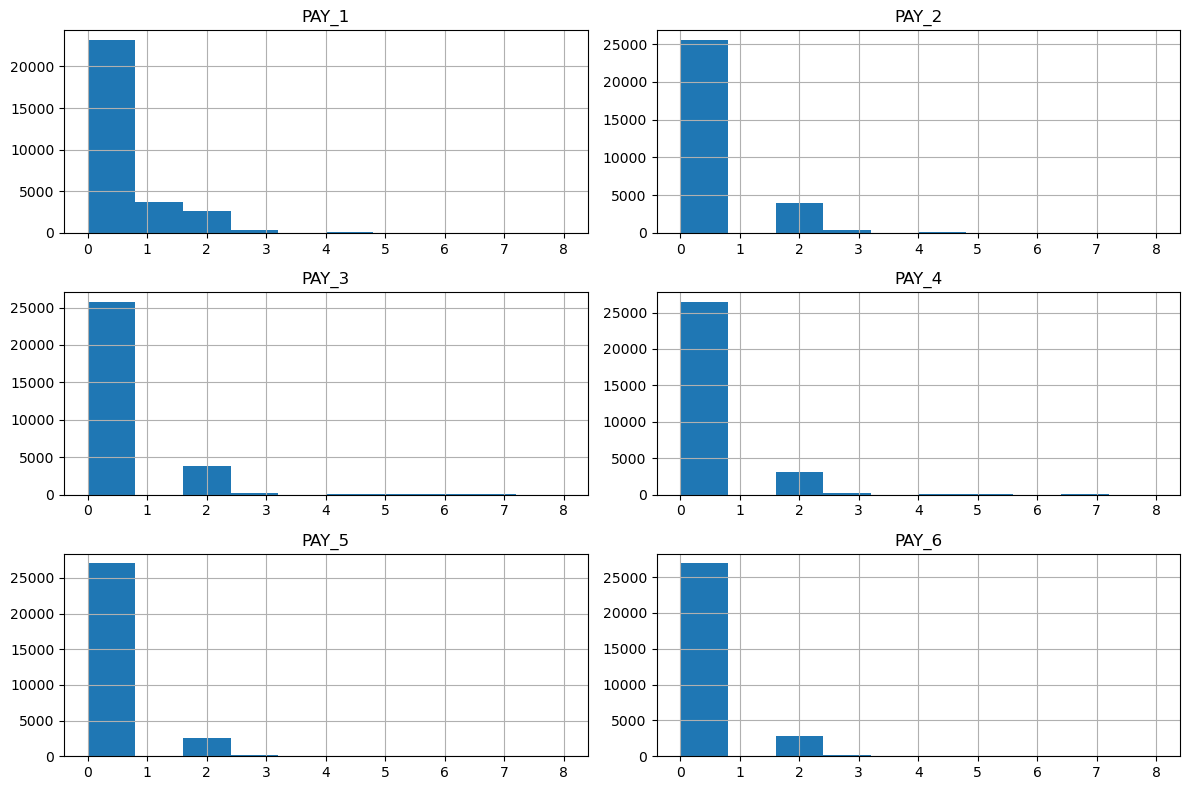

In [50]:
from pyspark.sql.functions import when
import matplotlib.pyplot as plt

# Define the columns to clean and plot
late_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Replace values in the specified columns
for col in late_columns:
    df = df.withColumn(col, when((df[col] == -2) | (df[col] == -1) | (df[col] == 0), 0).otherwise(df[col]))

# Show histograms for the specified columns
late = df[late_columns].toPandas()
fig = plt.figure()
late.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

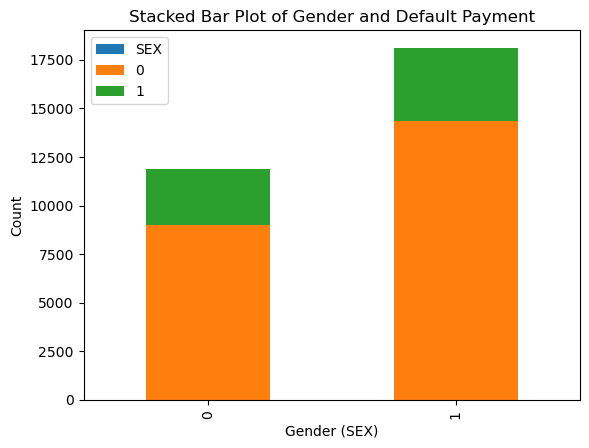

In [51]:
import matplotlib.pyplot as plt

# Group by SEX and def_pay, and count the occurrences
gender = df.groupBy('SEX', 'def_pay').count()

# Pivot the table to have def_pay as columns
gender_pivot = gender.groupBy('SEX').pivot('def_pay').sum('count')

# Fill NaN values with 0
gender_pivot = gender_pivot.na.fill(0)

# Create a stacked bar plot
ax = gender_pivot.toPandas().plot(kind='bar', stacked=True)

# Customize the plot
ax.set_xlabel("Gender (SEX)")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Plot of Gender and Default Payment")

# Show the plot
plt.show()


The bar plot visualizes the distribution of default payments by gender within a dataset, with "0" representing males and "1" representing females. Each gender category has two bars associated with it, likely indicating the presence (1) or absence (0) of a default payment. The bottom orange segment of each bar shows the count of individuals who did not have a default payment, while the top green segment represents those who did.

The code does the following steps to generate the plot:

Data is grouped by 'SEX' and 'def_pay' columns, and the count of occurrences is calculated.
The data is then pivoted to have 'def_pay' as columns, which transforms the data so that default payment categories are laid out as separate columns, facilitating a stacked bar plot.
Any NaN values, which could occur if there were no occurrences for a category, are filled with 0 to avoid plotting issues.
The data is then converted to a Pandas DataFrame and plotted as a stacked bar plot using Matplotlib, with different colors for each 'def_pay' category.
The axes are labeled "Gender (SEX)" for the x-axis and "Count" for the y-axis, and the plot is titled "Stacked Bar Plot of Gender and Default Payment".
The plot reveals that among both males and females, there are more individuals without a default payment (orange segment) than with one (green segment). However, the proportion of defaulters to non-defaulters differs between the genders.

In [52]:
from pyspark.sql import functions as F

# Group by SEX and def_pay, and count the occurrences
gender = df.groupBy('SEX', 'def_pay').count()

# Pivot the table to have def_pay as columns
gender_pivot = gender.groupBy('SEX').pivot('def_pay').sum('count')

# Fill NaN values with 0
gender_pivot = gender_pivot.na.fill(0)

# Calculate the percentage of default payment
gender_pivot = gender_pivot.withColumn('perc', (F.col('1') / (F.col('0') + F.col('1')) * 100))

# Round the percentage to 2 decimal places
gender_pivot = gender_pivot.withColumn('perc', F.round('perc', 2))

# Show the resulting DataFrame
gender_pivot.show()

+---+-----+----+-----+
|SEX|    0|   1| perc|
+---+-----+----+-----+
|  1| 9015|2873|24.17|
|  2|14349|3763|20.78|
+---+-----+----+-----+



## Feature Engineering

In [53]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_1: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- def_pay: integer (nullable = tru

In [54]:
result=df.groupBy('EDUCATION', 'def_pay').count().groupBy('EDUCATION').pivot('def_pay').agg(F.sum("count"))
result.show()

+---------+-----+----+
|EDUCATION|    0|   1|
+---------+-----+----+
|        1| 8549|2036|
|        3| 3680|1237|
|        4|  435|  33|
|        2|10700|3330|
+---------+-----+----+



In [55]:
from pyspark.sql.functions import col, first

def corr_2_cols(df, col1, col2):
    df = df.withColumn("SE_MA", col(col1) * col(col2))
    result = df.groupBy(col1, col2).count().groupBy(col1).pivot(col2).sum("count").fillna(0)
    result = result.withColumn("perc", result[2] / (result[1] + result[2]))
    return result

# Example usage:
result = corr_2_cols(df, "SEX", "MARRIAGE")
result.show()


+---+----+----+---+------------------+
|SEX|   1|   2|  3|              perc|
+---+----+----+---+------------------+
|  1|5190|6553|145|0.5580345737886401|
|  2|8469|9411|232|0.5263422818791946|
+---+----+----+---+------------------+



The function corr_2_cols is designed to calculate the proportion of one column's values given another column's values in a DataFrame using PySpark. Here's a breakdown of the function's operations:

A new column "SE_MA" is created by multiplying the values of the two columns col1 and col2.

The DataFrame is grouped by col1 and col2, and the count of occurrences for each group is computed.

The resulting DataFrame is then grouped by col1 alone and pivoted on col2, summing up the counts for each pivot column, which effectively creates a contingency table where each entry represents the count of occurrences of the unique pairs of col1 and col2.

Any missing values after the pivot are filled with 0 to avoid nulls in the DataFrame.

A new column "perc" is created to calculate the proportion of the second value of col2 within each group of col1. It's computed by dividing the count of the second value of col2 by the sum of the counts of the first and second values of col2.

In [56]:
# Similarly if we seen for the Eduaction and default 
corr_2_cols(df, 'EDUCATION', 'def_pay').show()

+---------+-----+----+-------------------+
|EDUCATION|    0|   1|               perc|
+---------+-----+----+-------------------+
|        1| 8549|2036|0.19234766178554558|
|        3| 3680|1237| 0.2515761643278422|
|        4|  435|  33|0.07051282051282051|
|        2|10700|3330|0.23734853884533144|
+---------+-----+----+-------------------+



In [57]:
corr_2_cols(df, 'MARRIAGE', 'def_pay').show()

+--------+-----+----+-------------------+
|MARRIAGE|    0|   1|               perc|
+--------+-----+----+-------------------+
|       1|10453|3206|0.23471703638626545|
|       3|  288|  89|0.23607427055702918|
|       2|12623|3341|0.20928338762214985|
+--------+-----+----+-------------------+



In [58]:
corr_2_cols(df, 'MARRIAGE', 'SEX').show()

+--------+----+----+------------------+
|MARRIAGE|   1|   2|              perc|
+--------+----+----+------------------+
|       1|5190|8469|0.6200307489567318|
|       3| 145| 232|0.6153846153846154|
|       2|6553|9411|0.5895139062891506|
+--------+----+----+------------------+



In [59]:
df = df.withColumn("SE_MA", df["SEX"] * df["MARRIAGE"])
df = df.withColumn("SE_MA_2", 
                   when((df["SEX"] == 1) & (df["MARRIAGE"] == 1), 1) #married man
                   .when((df["SEX"] == 1) & (df["MARRIAGE"] == 2), 2) #single man
                   .when((df["SEX"] == 1) & (df["MARRIAGE"] == 3), 3) #divorced man
                   .when((df["SEX"] == 2) & (df["MARRIAGE"] == 1), 4) #married women
                   .when((df["SEX"] == 2) & (df["MARRIAGE"] == 2), 5) #single women
                   .when((df["SEX"] == 2) & (df["MARRIAGE"] == 3), 6) #divorced women
                   .otherwise(0)
                  )
corr_2_cols(df, 'SE_MA_2', 'def_pay').show()

+-------+----+----+-------------------+
|SE_MA_2|   0|   1|               perc|
+-------+----+----+-------------------+
|      1|3844|1346|0.25934489402697497|
|      6| 185|  47| 0.2025862068965517|
|      3| 103|  42| 0.2896551724137931|
|      5|7555|1856| 0.1972160238019339|
|      4|6609|1860| 0.2196245129295076|
|      2|5068|1485|0.22661376468792918|
+-------+----+----+-------------------+



In [60]:
df = df.drop("SE_MA")
df=df.withColumnRenamed('SE_MA_2', 'SE_MA')

In [61]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_1: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- def_pay: integer (nullable = tru

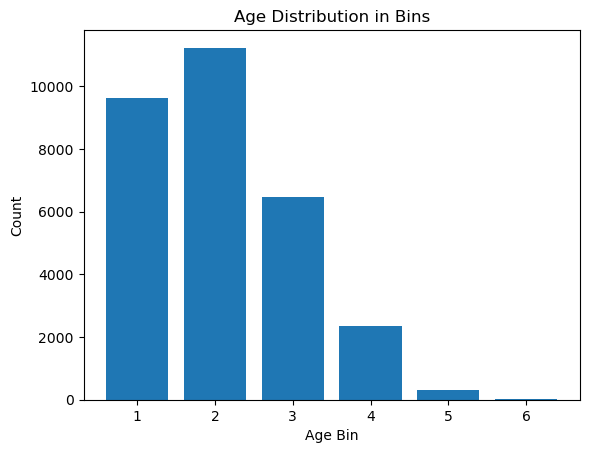

In [62]:
from pyspark.sql.functions import when, col
import matplotlib.pyplot as plt

# Define age bin conditions
age_bins = [
    (col("AGE") > 20) & (col("AGE") < 30),
    (col("AGE") >= 30) & (col("AGE") < 40),
    (col("AGE") >= 40) & (col("AGE") < 50),
    (col("AGE") >= 50) & (col("AGE") < 60),
    (col("AGE") >= 60) & (col("AGE") < 70),
    (col("AGE") >= 70) & (col("AGE") <= 80)
]

# Define corresponding age bin labels
age_bin_labels = [1, 2, 3, 4, 5, 6]

# Add a new column 'AgeBin' based on the conditions
df = df.withColumn("AgeBin", when(age_bins[0], age_bin_labels[0])
                    .when(age_bins[1], age_bin_labels[1])
                    .when(age_bins[2], age_bin_labels[2])
                    .when(age_bins[3], age_bin_labels[3])
                    .when(age_bins[4], age_bin_labels[4])
                    .when(age_bins[5], age_bin_labels[5])
                    .otherwise(0))

# Calculate the histogram of the 'AgeBin' column
hist_data = df.groupBy("AgeBin").count().orderBy("AgeBin")

# Convert the result to a Pandas DataFrame for plotting
hist_df = hist_data.toPandas()

# Plot the histogram
plt.bar(hist_df['AgeBin'], hist_df['count'])
plt.xlabel("Age Bin")
plt.ylabel("Count")
plt.title("Age Distribution in Bins")
plt.show()


The code and the accompanying bar chart visualize the age distribution of individuals within a dataset, grouped into specific age ranges (bins). Each bin represents an age range, with bin 1 for ages 21-29, bin 2 for ages 30-39, and so on up to bin 6 for ages 70-80. In the DataFrame, a new column 'AgeBin' is created that assigns each individual to one of these bins based on their age. The counts of individuals in each age bin are calculated, ordered by 'AgeBin', and then converted into a Pandas DataFrame to facilitate plotting.

The bar chart displays this age distribution, with the x-axis representing the age bins and the y-axis showing the count of individuals in each bin. The height of each bar corresponds to the number of individuals within the respective age range. The chart indicates that bins 2 and 1, representing the age ranges 30-39 and 21-29 respectively, have the highest counts, suggesting that a majority of individuals in the dataset fall within these age ranges. The count decreases for subsequent bins, indicating fewer individuals in the older age ranges.

In [63]:
corr_2_cols(df, 'AgeBin', 'def_pay').show()

+------+----+----+-------------------+
|AgeBin|   0|   1|               perc|
+------+----+----+-------------------+
|     1|7421|2197|0.22842586816385943|
|     6|  18|   7|               0.28|
|     3|4979|1485| 0.2297339108910891|
|     5| 225|  89|0.28343949044585987|
|     4|1759| 582|0.24861170439982913|
|     2|8962|2276|0.20252714006050898|
+------+----+----+-------------------+



In [64]:
# Define SE_AG conditions
se_ag_conditions = [
    (col("SEX") == 1) & (col("AgeBin") == 1),
    (col("SEX") == 1) & (col("AgeBin") == 2),
    (col("SEX") == 1) & (col("AgeBin") == 3),
    (col("SEX") == 1) & (col("AgeBin") == 4),
    (col("SEX") == 1) & (col("AgeBin") == 5),
    (col("SEX") == 2) & (col("AgeBin") == 1),
    (col("SEX") == 2) & (col("AgeBin") == 2),
    (col("SEX") == 2) & (col("AgeBin") == 3),
    (col("SEX") == 2) & (col("AgeBin") == 4),
    (col("SEX") == 2) & (col("AgeBin") == 5)
]

# Define corresponding SE_AG labels
se_ag_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Add a new column 'SE_AG' based on the conditions
df = df.withColumn("SE_AG", when(se_ag_conditions[0], se_ag_labels[0]) #man in 20's
                    .when(se_ag_conditions[1], se_ag_labels[1]) #man in 30's
                    .when(se_ag_conditions[2], se_ag_labels[2]) #man in 40's
                    .when(se_ag_conditions[3], se_ag_labels[3]) #man in 50's
                    .when(se_ag_conditions[4], se_ag_labels[4]) #man in 60's and above
                    .when(se_ag_conditions[5], se_ag_labels[5]) #mwoman in 20's
                    .when(se_ag_conditions[6], se_ag_labels[6]) #woman in 30's
                    .when(se_ag_conditions[7], se_ag_labels[7]) #woman in 40's
                    .when(se_ag_conditions[8], se_ag_labels[8]) #woman in 50's
                    .when(se_ag_conditions[9], se_ag_labels[9]) #woman in 60's and above
                    .otherwise(1))

corr_2_cols(df, 'SE_AG', 'def_pay').show()

+-----+----+----+-------------------+
|SE_AG|   0|   1|               perc|
+-----+----+----+-------------------+
|    1|2510| 796|0.24077434966727163|
|    6|4929|1408|0.22218715480511284|
|    3|2080| 691|0.24936845904005775|
|    5| 122|  44|0.26506024096385544|
|    9| 962| 287|0.22978382706164932|
|    4| 797| 295|0.27014652014652013|
|    8|2899| 794|  0.215001353912808|
|    7|5447|1226|0.18372546081222837|
|   10| 103|  45|0.30405405405405406|
|    2|3515|1050|0.23001095290251916|
+-----+----+----+-------------------+



In [65]:
from pyspark.sql.functions import when, col
from pyspark.sql import functions as F

# Define columns for months
months = ['6', '5', '4', '3', '2', '1']

# Loop through each month to create the corresponding 'Client_X' columns
for month in months:
    df = df.withColumn("Client_" + month, when(
        (col("PAY_" + month) == 0) &
        (col("BILL_AMT" + month) == 0) &
        (col("PAY_AMT" + month) == 0), 0
    ).otherwise(1))

# Calculate the count of clients for each month
client_counts = [df.filter(col("Client_" + month) == 1).count() for month in months]

# Create a PySpark DataFrame to display the results
result_df = spark.createDataFrame(list(zip(months, client_counts)), ["Month", "Client_Count"])

# Show the results
result_df.show()

+-----+------------+
|Month|Client_Count|
+-----+------------+
|    6|       26700|
|    5|       27247|
|    4|       27572|
|    3|       27810|
|    2|       28183|
|    1|       29477|
+-----+------------+



In [66]:
from pyspark.sql.functions import col

# Define the columns and perform the calculations
df = df.withColumn("Avg_exp_5", ((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) / col("LIMIT_BAL")))
df = df.withColumn("Avg_exp_4", (((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) +
                 (col("BILL_AMT4") - (col("BILL_AMT5") - col("PAY_AMT4"))) / 2) / col("LIMIT_BAL")))
df = df.withColumn("Avg_exp_3", (((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) +
                 (col("BILL_AMT4") - (col("BILL_AMT5") - col("PAY_AMT4"))) +
                 (col("BILL_AMT3") - (col("BILL_AMT4") - col("PAY_AMT3"))) / 3) / col("LIMIT_BAL")))
df = df.withColumn("Avg_exp_2", (((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) +
                 (col("BILL_AMT4") - (col("BILL_AMT5") - col("PAY_AMT4"))) +
                 (col("BILL_AMT3") - (col("BILL_AMT4") - col("PAY_AMT3"))) +
                 (col("BILL_AMT2") - (col("BILL_AMT3") - col("PAY_AMT2"))) / 4) / col("LIMIT_BAL")))
df = df.withColumn("Avg_exp_1", (((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) +
                 (col("BILL_AMT4") - (col("BILL_AMT5") - col("PAY_AMT4"))) +
                 (col("BILL_AMT3") - (col("BILL_AMT4") - col("PAY_AMT3"))) +
                 (col("BILL_AMT2") - (col("BILL_AMT3") - col("PAY_AMT2"))) +
                 (col("BILL_AMT1") - (col("BILL_AMT2") - col("PAY_AMT1"))) / 5) / col("LIMIT_BAL")))

# Select the columns of interest and sample 20 rows
result_df = df.select("LIMIT_BAL", "Avg_exp_5", "BILL_AMT5", "Avg_exp_4", "BILL_AMT4",
                      "Avg_exp_3", "BILL_AMT3", "Avg_exp_2", "BILL_AMT2", "Avg_exp_1",
                      "BILL_AMT1", "def_pay").sample(withReplacement=False, fraction=0.1, seed=42)

# Show the resulting DataFrame
result_df.toPandas()


,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,def_pay
0,100000,0.009610,-159,0.014415,221,0.020487,601,0.023970,380,0.050572,11876,0
1,20000,0.022550,17905,0.033375,18338,0.054033,17428,0.080975,18010,0.108460,15376,1
2,360000,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0
3,70000,0.011386,38659,0.016843,39423,0.026738,38355,0.038886,36171,0.051189,37042,1
4,200000,0.002430,700,0.003595,1166,0.005287,782,0.006735,1098,0.008409,1587,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2986,220000,0.001200,528,0.001800,292,0.002800,264,0.003900,264,0.005040,528,0
2987,180000,0.062861,1415,0.100319,14834,0.166233,28674,0.247522,44638,0.330443,51323,0
2988,50000,0.095540,19971,0.429430,50360,0.790233,49397,0.862690,49123,0.938080,43998,0
2989,100000,0.164690,69473,0.185455,70626,0.327453,102996,0.595457,1427,0.679300,3042,0


In [67]:
# Create the 'Closeness_X' columns
for month in range(1, 7):
    df = df.withColumn(f"Closeness_{month}", (col("LIMIT_BAL") - col(f"BILL_AMT{month}")) / col("LIMIT_BAL"))


In [68]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_1: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- def_pay: integer (nullable = tru

In [69]:
df.toPandas()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6
0,1,20000,2,2,1,24,2,2,0,0,...,0.000000,0.011483,0.073225,0.197660,0.804350,0.844900,0.965550,1.000000,1.000000,1.000000
1,2,120000,2,2,2,26,0,2,0,0,...,0.005021,0.009564,0.011931,0.013795,0.977650,0.985625,0.977650,0.972733,0.971208,0.972825
2,3,90000,2,2,2,34,0,0,0,0,...,0.006561,0.009533,0.016689,0.070267,0.675122,0.844144,0.849344,0.840767,0.833911,0.827233
3,4,50000,2,2,1,37,0,0,0,0,...,0.014170,0.166567,0.467065,0.484508,0.060200,0.035340,0.014180,0.433720,0.420820,0.409060
4,5,50000,1,2,1,57,0,0,0,0,...,0.122020,0.395927,0.760440,0.877968,0.827660,0.886600,0.283300,0.581200,0.617080,0.617380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,0.228018,0.553905,0.938852,0.958235,0.141145,0.123568,0.052886,0.599982,0.858014,0.927364
29996,29997,150000,1,3,2,43,0,0,0,0,...,0.047660,0.068544,0.087280,0.098796,0.988780,0.987813,0.976653,0.940140,0.965400,1.000000
29997,29998,30000,1,2,2,37,4,3,2,0,...,0.182433,0.300478,0.391683,0.408027,0.881167,0.888133,0.908067,0.304067,0.313933,0.354767
29998,29999,80000,1,3,1,41,1,0,0,0,...,0.466219,0.836950,1.059988,1.126090,1.020563,0.020262,0.046200,0.340325,0.851812,0.388200


### Unbalanced Target Variable

In [70]:
class_counts = df.groupBy("def_pay").count()
class_counts.show()

+-------+-----+
|def_pay|count|
+-------+-----+
|      1| 6636|
|      0|23364|
+-------+-----+



In [71]:
temp_df=df.toPandas()
temp_df.shape

(30000, 45)

In [72]:
df1=df # create a temporary copy of the orginal dataframe so that any changes in the temporary one will not affect the orginal dataframe.

In [73]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
from imblearn.over_sampling import SMOTE
from pyspark.sql.functions import col

# Define the target column name
target_column = 'def_pay'

# Select the feature columns and target column
feature_columns = [col_name for col_name in df1.columns if col_name != target_column]
df1 = df1.select(feature_columns + [target_column])

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = df1.toPandas()

# Apply SMOTE on the pandas DataFrame
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(pandas_df[feature_columns], pandas_df[target_column])

# Create a new pandas DataFrame with resampled data
resampled_df = pd.concat([pd.DataFrame(y_resampled, columns=[target_column]), pd.DataFrame(X_resampled, columns=feature_columns)], axis=1)

# Convert the resampled pandas DataFrame back to a PySpark DataFrame
resampled_df_spark = spark.createDataFrame(resampled_df)

# Display the class distribution after SMOTE
class_distribution = resampled_df_spark.groupBy(target_column).count()
class_distribution.show()

+-------+-----+
|def_pay|count|
+-------+-----+
|      0|23364|
|      1|23364|
+-------+-----+



In [75]:
resampled_df_spark.groupBy('def_pay').count().show()

+-------+-----+
|def_pay|count|
+-------+-----+
|      0|23364|
|      1|23364|
+-------+-----+



In [76]:
resampled_df_spark.toPandas().shape

(46728, 45)

In [77]:
resampled_df_spark.toPandas().head(10)

,def_pay,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6
0,1,1,20000,2,2,1,24,2,2,0,...,0.000000,0.011483,0.073225,0.197660,0.804350,0.844900,0.965550,1.000000,1.000000,1.000000
1,1,2,120000,2,2,2,26,0,2,0,...,0.005021,0.009564,0.011931,0.013795,0.977650,0.985625,0.977650,0.972733,0.971208,0.972825
2,0,3,90000,2,2,2,34,0,0,0,...,0.006561,0.009533,0.016689,0.070267,0.675122,0.844144,0.849344,0.840767,0.833911,0.827233
3,0,4,50000,2,2,1,37,0,0,0,...,0.014170,0.166567,0.467065,0.484508,0.060200,0.035340,0.014180,0.433720,0.420820,0.409060
4,0,5,50000,1,2,1,57,0,0,0,...,0.122020,0.395927,0.760440,0.877968,0.827660,0.886600,0.283300,0.581200,0.617080,0.617380
5,0,6,50000,1,1,2,37,0,0,0,...,0.019650,0.286540,0.811200,0.869664,-0.288000,-0.141380,-0.152160,0.612120,0.607620,0.599520
6,0,7,500000,1,1,2,29,0,0,0,...,0.125507,0.165632,0.089612,0.104513,0.264070,0.175954,0.109986,-0.085306,0.033994,0.052112
7,0,8,100000,2,2,2,23,0,0,0,...,0.014415,0.020487,0.023970,0.050572,0.881240,0.996200,0.993990,0.997790,1.001590,0.994330
8,0,9,140000,2,3,1,28,0,0,2,...,0.069879,0.075726,0.080843,0.092233,0.919393,0.899314,0.913514,0.912779,0.915764,0.973436
9,0,10,20000,1,3,2,35,0,0,0,...,0.010850,0.010850,0.010850,0.010850,1.000000,1.000000,1.000000,1.000000,0.349650,0.304400


In [78]:
# Drop the column def_pay. As def_pay and def_pay_smote are both same column.
#df_spark_new = resampled_df_spark.drop('def_pay')
df_spark_new = resampled_df_spark
df_spark_new.printSchema()

root
 |-- def_pay: long (nullable = true)
 |-- ID: long (nullable = true)
 |-- LIMIT_BAL: long (nullable = true)
 |-- SEX: long (nullable = true)
 |-- EDUCATION: long (nullable = true)
 |-- MARRIAGE: long (nullable = true)
 |-- AGE: long (nullable = true)
 |-- PAY_1: long (nullable = true)
 |-- PAY_2: long (nullable = true)
 |-- PAY_3: long (nullable = true)
 |-- PAY_4: long (nullable = true)
 |-- PAY_5: long (nullable = true)
 |-- PAY_6: long (nullable = true)
 |-- BILL_AMT1: long (nullable = true)
 |-- BILL_AMT2: long (nullable = true)
 |-- BILL_AMT3: long (nullable = true)
 |-- BILL_AMT4: long (nullable = true)
 |-- BILL_AMT5: long (nullable = true)
 |-- BILL_AMT6: long (nullable = true)
 |-- PAY_AMT1: long (nullable = true)
 |-- PAY_AMT2: long (nullable = true)
 |-- PAY_AMT3: long (nullable = true)
 |-- PAY_AMT4: long (nullable = true)
 |-- PAY_AMT5: long (nullable = true)
 |-- PAY_AMT6: long (nullable = true)
 |-- SE_MA: long (nullable = true)
 |-- AgeBin: long (nullable = true)
 

## Train, Test split

In [79]:
from pyspark.sql.functions import col, sum

# Check for null values in each column
null_counts = df_spark_new.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark_new.columns])

# Display the counts of null values in each column
null_counts.show()


+-------+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-----+------+-----+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+-----------+-----------+-----------+-----------+-----------+-----------+
|def_pay| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|SE_MA|AgeBin|SE_AG|Client_6|Client_5|Client_4|Client_3|Client_2|Client_1|Avg_exp_5|Avg_exp_4|Avg_exp_3|Avg_exp_2|Avg_exp_1|Closeness_1|Closeness_2|Closeness_3|Closeness_4|Closeness_5|Closeness_6|
+-------+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-----+--

## Machine Learning models

- creating a spark data frame which collects all the metrics of each model to compare the results.

In [80]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

schema = StructType([
    StructField("Model", StringType(), True),
    StructField("Accuracy", DoubleType(), True),
    StructField("Precision", DoubleType(), True),
    StructField("Recall", DoubleType(), True),
    StructField("F1", DoubleType(), True),
    StructField("AUC", StringType(), True),
])

In [81]:
performance_df = spark.createDataFrame([], schema=schema)
# performance dataframe in spark

### Classification Metrics: Accuracy, Precision, Recall, F1 score, confusion Matrix

In [82]:
## method to collect metric in spark dataframe
def metrics_matrix(predictions):
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator

    evaluator = MulticlassClassificationEvaluator(labelCol=target_label, predictionCol="prediction")
    
    # Calculate accuracy
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    #print(f"Accuracy: {accuracy}")
    
    # Calculate weighted precision
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    #print(f"Precision: {precision}")
    
    # Calculate weighted recall
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    #print(f"Recall: {recall}")
    
    # Calculate weighted F1 score
    f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
    #print(f" F1 Score: {f1}")
    
    # caluclate AUC
    binary_evaluator_random = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=target_label)
    auc = binary_evaluator_random.evaluate(predictions, {binary_evaluator_random.metricName: "areaUnderROC"})
    #print(f" Area Under Curve: {auc}")
    return accuracy,precision,recall,f1,auc

## Splitting the data

In [83]:
# Split the data into training and testing sets using randomSplit
train_df, test_df = df_spark_new.randomSplit([0.7, 0.3], seed=42)

# Define features (all columns except 'def_pay_smote') and the target label
features = [col for col in df_spark_new.columns if col != 'def_pay']
target_label = 'def_pay'

### Logistic Regression

In [84]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Create a VectorAssembler to assemble features
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)
test_data = assembler.transform(test_df)

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol=target_label)

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)


In [85]:
from pyspark.sql import Row
accuracy,precision,recall,f1_score,auc = metrics_matrix(predictions)
performance_df = performance_df.union(
    spark.createDataFrame([Row("Log_reg", accuracy,precision,recall,f1_score,auc)], schema=schema)
)
performance_df.show()

+-------+----------------+------------------+----------------+------------------+------------------+
|  Model|        Accuracy|         Precision|          Recall|                F1|               AUC|
+-------+----------------+------------------+----------------+------------------+------------------+
|Log_reg|0.79019014693172|0.7952948610536036|0.79019014693172|0.7893249028124456|0.8620486988513951|
+-------+----------------+------------------+----------------+------------------+------------------+



### Plots ROC and area under PR curve

In [86]:
def curves(predictions):
    
    from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

    # Extract raw predictions and labels
    raw_predictions = predictions.select("rawPrediction").rdd.map(lambda row: row[0].toArray())
    labels = predictions.select(target_label).rdd.map(lambda row: row[0])

    import numpy as np

    # Convert raw predictions and labels to NumPy arrays
    raw_predictions = np.array(raw_predictions.collect())
    labels = np.array(labels.collect())

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(labels, raw_predictions[:, 1])
    roc_auc = auc(fpr, tpr)

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(labels, raw_predictions[:, 1])
    average_precision = average_precision_score(labels, raw_predictions[:, 1])

    # Plot ROC curve
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    # Plot precision-recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})', color='orange')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    return plt.show()


### Support Vector Machines

In [87]:
# Split the data into training and testing sets using randomSplit
train_df, test_df = df_spark_new.randomSplit([0.7, 0.3], seed=42)

# Define features (all columns except 'def_pay_smote') and the target label
features = [col for col in df_spark_new.columns if col != 'def_pay']
target_label = 'def_pay'

In [88]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

# Create a VectorAssembler to assemble features
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)
test_data = assembler.transform(test_df)

# Create a LinearSVC model
svm = LinearSVC(featuresCol="features", labelCol=target_label, maxIter=50)
svm_model = svm.fit(train_data)

# Make predictions on the test data
predictions = svm_model.transform(test_data)

In [89]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = predictions.select("prediction").collect()
y_orig = predictions.select(target_label).collect()
cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5990  935]
 [2019 4940]]


In [90]:
accuracy,precision,recall,f1_score,auc = metrics_matrix(predictions)
performance_df = performance_df.union(
    spark.createDataFrame([Row("SVM", accuracy,precision,recall,f1_score,auc)], schema=schema)
)
performance_df.show()

+-------+------------------+------------------+------------------+------------------+------------------+
|  Model|          Accuracy|         Precision|            Recall|                F1|               AUC|
+-------+------------------+------------------+------------------+------------------+------------------+
|Log_reg|  0.79019014693172|0.7952948610536036|  0.79019014693172|0.7893249028124456|0.8620486988513951|
|    SVM|0.7872371074618265| 0.794493634956254|0.7872371074618265| 0.785973604438911|0.8567165289423405|
+-------+------------------+------------------+------------------+------------------+------------------+



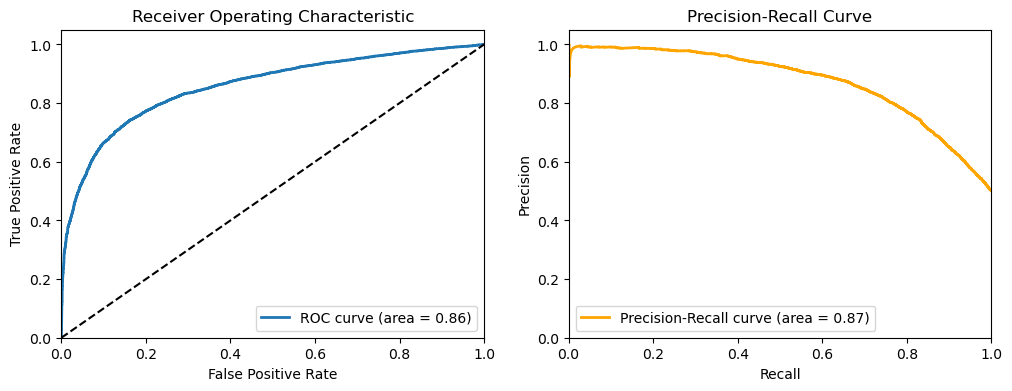

In [91]:
curves(predictions)

# Random Forest Classifier

In [92]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol=target_label, numTrees=100, maxDepth=5, seed=42)

# Fit the model to the training data
rf_model = rf.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

In [93]:
accuracy,precision,recall,f1_score,auc = metrics_matrix(predictions)
performance_df = performance_df.union(
    spark.createDataFrame([Row("RF", accuracy,precision,recall,f1_score,auc)], schema=schema)
)
performance_df.show()

+-------+------------------+------------------+------------------+------------------+------------------+
|  Model|          Accuracy|         Precision|            Recall|                F1|               AUC|
+-------+------------------+------------------+------------------+------------------+------------------+
|Log_reg|  0.79019014693172|0.7952948610536036|  0.79019014693172|0.7893249028124456|0.8620486988513951|
|    SVM|0.7872371074618265| 0.794493634956254|0.7872371074618265| 0.785973604438911|0.8567165289423405|
|     RF|0.7760011524056468|0.7828769905535298|0.7760011524056467|0.7746909159726082|0.8419498631229952|
+-------+------------------+------------------+------------------+------------------+------------------+



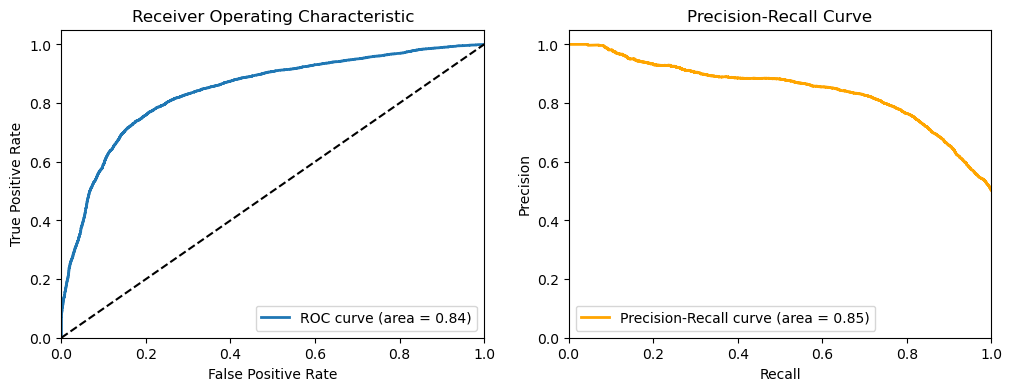

In [94]:
curves(predictions)

# Decision Tree Classifier

In [95]:
# Split the data into training and testing sets using randomSplit
train_df, test_df = df_spark_new.randomSplit([0.7, 0.3], seed=42)

# Define features (all columns except 'def_pay_smote') and the target label
features = [col for col in df_spark_new.columns if col != 'def_pay']
target_label = 'def_pay'

In [96]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

# Create a VectorAssembler to assemble features
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)
test_data = assembler.transform(test_df)

# Create a LinearSVC model
dt = DecisionTreeClassifier(featuresCol="features", labelCol=target_label)
dt_model = dt.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)


In [97]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = predictions.select("prediction").collect()
y_orig = predictions.select(target_label).collect()
cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4964 1961]
 [1970 4989]]


In [98]:
accuracy,precision,recall,f1_score,auc = metrics_matrix(predictions)
performance_df = performance_df.union(
    spark.createDataFrame([Row("Dtree", accuracy,precision,recall,f1_score,auc)], schema=schema)
)
performance_df.show()

+-------+------------------+------------------+------------------+------------------+------------------+
|  Model|          Accuracy|         Precision|            Recall|                F1|               AUC|
+-------+------------------+------------------+------------------+------------------+------------------+
|Log_reg|  0.79019014693172|0.7952948610536036|  0.79019014693172|0.7893249028124456|0.8620486988513951|
|    SVM|0.7872371074618265| 0.794493634956254|0.7872371074618265| 0.785973604438911|0.8567165289423405|
|     RF|0.7760011524056468|0.7828769905535298|0.7760011524056467|0.7746909159726082|0.8419498631229952|
|  Dtree|0.7168683376548545|0.7168696010671237|0.7168683376548546|0.7168686681333122|0.5974252805109657|
+-------+------------------+------------------+------------------+------------------+------------------+



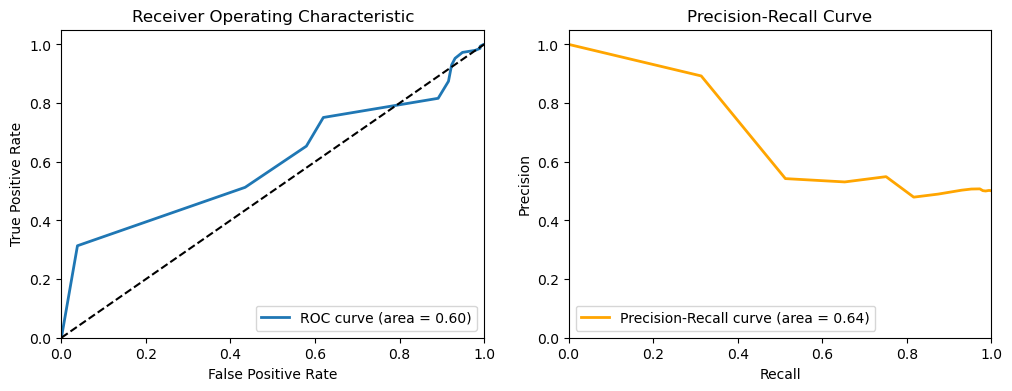

In [99]:
curves(predictions)

# Multilayer Perceptron

In [100]:
# Split the data into training and testing sets using randomSplit
train_df, test_df = df_spark_new.randomSplit([0.7, 0.3], seed=42)

# Define features (all columns except 'def_pay_smote') and the target label
features = [col for col in df_spark_new.columns if col != 'def_pay']
target_label = 'def_pay'

In [101]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Create a VectorAssembler to assemble features
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)  # Assuming you have a train DataFrame

# Define the layers for the MLP
# For example, 3 input features, 2 hidden layers with 5 nodes each, and 3 output classes
layers = [len(features), 5, 5, 3]

# Create an MLP classifier
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol=target_label, layers=layers)

# Fit the model to the training data
mlp_model = mlp.fit(train_data)

# Make predictions on the test data
test_data = assembler.transform(test_df)  
predictions = mlp_model.transform(test_data)


In [102]:
# Define the evaluator
evaluator_mlp = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)

# Create a MulticlassClassificationEvaluator for evaluating accuracy, precision, recall, and F1 score
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol=target_label, predictionCol="prediction")

# Calculate accuracy
accuracy = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "accuracy"})
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
print(f"Precision: {precision}")

# Calculate recall
recall = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedRecall"})
print(f"Recall: {recall}")

# Calculate F1 score
f1 = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "f1"})
print(f"F1 Score: {f1}")



Accuracy: 0.5146211466436186
Precision: 0.5179735609782943
Recall: 0.5146211466436186
F1 Score: 0.4864668665965908


In [103]:
performance_df = performance_df.union(
    spark.createDataFrame([Row("MLP", accuracy,precision,recall,f1_score,"NA")], schema=schema)
)
performance_df.show()

+-------+------------------+------------------+------------------+------------------+------------------+
|  Model|          Accuracy|         Precision|            Recall|                F1|               AUC|
+-------+------------------+------------------+------------------+------------------+------------------+
|Log_reg|  0.79019014693172|0.7952948610536036|  0.79019014693172|0.7893249028124456|0.8620486988513951|
|    SVM|0.7872371074618265| 0.794493634956254|0.7872371074618265| 0.785973604438911|0.8567165289423405|
|     RF|0.7760011524056468|0.7828769905535298|0.7760011524056467|0.7746909159726082|0.8419498631229952|
|  Dtree|0.7168683376548545|0.7168696010671237|0.7168683376548546|0.7168686681333122|0.5974252805109657|
|    MLP|0.5146211466436186|0.5179735609782943|0.5146211466436186|0.7168686681333122|                NA|
+-------+------------------+------------------+------------------+------------------+------------------+



In [104]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = predictions.select("prediction").collect()
y_orig = predictions.select(target_label).collect()
cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1939 4986]
 [1753 5206]]


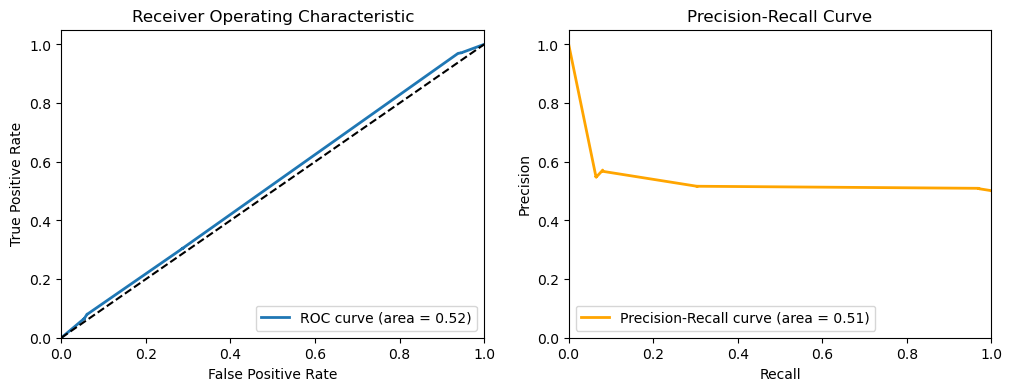

In [105]:
curves(predictions)

In [106]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [113]:
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)
test_data = assembler.transform(test_df)

For k=20, WSSSE = 157602020539674.44, Silhouette Score = 0.3900460179097791


For k=21, WSSSE = 153931761327605.7, Silhouette Score = 0.4284602639954581
For k=22, WSSSE = 151017720664886.22, Silhouette Score = 0.38310105658950677
For k=23, WSSSE = 148090660815657.22, Silhouette Score = 0.4161058934877171
For k=24, WSSSE = 144887801049671.12, Silhouette Score = 0.3823994674423065
For k=25, WSSSE = 145045760218808.2, Silhouette Score = 0.4745842540300211
For k=26, WSSSE = 139548430394967.44, Silhouette Score = 0.39649202393077143
For k=27, WSSSE = 135688809092509.61, Silhouette Score = 0.4060397698300734
For k=28, WSSSE = 134925699932227.4, Silhouette Score = 0.40180271545528135


For k=29, WSSSE = 133892026659927.84, Silhouette Score = 0.40250330262500245


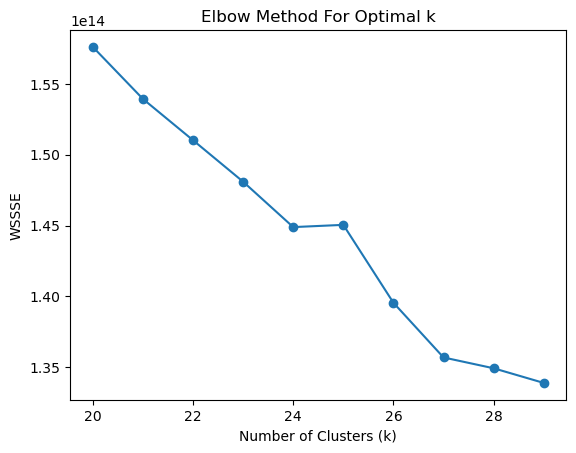

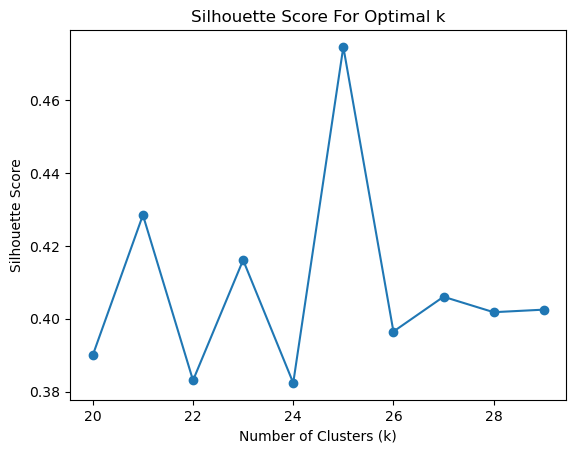

In [115]:
wssse_values = []
silhouette_values = []
#evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='scaled_features', metricName='silhouette')
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', metricName='silhouette')

for i in range(20, 30):
    kmeans = KMeans(featuresCol='features', k=i)
    model = kmeans.fit(train_data)
    predictions = model.transform(test_data)
    
    # Compute Within Set Sum of Squared Errors (WSSSE) after fitting the model
    wssse = model.summary.trainingCost
    wssse_values.append(wssse)
    
    # Evaluate clustering by computing Silhouette score
    silhouette = evaluator.evaluate(predictions)
    silhouette_values.append(silhouette)
    
    print(f"For k={i}, WSSSE = {wssse}, Silhouette Score = {silhouette}")

# Plot the WSSSE values
plt.plot(range(20, 30), wssse_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WSSSE')
plt.show()

# Plot the Silhouette scores
plt.plot(range(20, 30), silhouette_values, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [116]:
kmeans = KMeans(featuresCol='features', k=i)
model = kmeans.fit(train_data)
predictions = model.transform(test_data)

In [ ]:
accuracy,precision,recall,f1_score,auc = metrics_matrix(predictions)
performance_df = performance_df.union(
    spark.createDataFrame([Row("Dtree", accuracy,precision,recall,f1_score,auc)], schema=schema)
)
performance_df.show()

In [125]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = predictions.select("prediction").collect()
y_orig = predictions.select(target_label).collect()
cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 743  269   69   18  565  776  774    7    9   85  124  339  700  566
    18   22  175  118   63  516  249  320   14   53  103  192   24   14]
 [ 613  284  100   28  388  545 1094    5    6   10   53  439 1297  656
     9   33   27   74   16  694  130  143    4   31   73  193    4   10]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    

### Conclusion

Based on the evaluation metrics for the different models, we can draw the following conclusions:

Logistic Regression (Log_reg):
Accuracy: 0.79
Precision: 0.80
Recall: 0.79
F1 Score: 0.79
AUC: 0.86


Conclusion: Logistic Regression performed well across various metrics, with high accuracy, precision, recall, and AUC.
Support Vector Machine (SVM):
Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
AUC: 0.86


Conclusion: SVM achieved results comparable to Logistic Regression, demonstrating its effectiveness in the classification task.
Random Forest (RF):
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1 Score: 0.77
AUC: 0.84


Conclusion: Random Forest performed well, though slightly lower than Logistic Regression and SVM in terms of accuracy and AUC.
Decision Tree (Dtree):
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.72
AUC: 0.60


Conclusion: Decision Tree showed lower performance compared to other models, with a notable decrease in AUC.
Multilayer Perceptron (MLP):
Accuracy: 0.51
Precision: 0.52
Recall: 0.51
F1 Score: 0.72 (Note: This value seems incorrect or out of scale compared to others)
AUC: Not available
Conclusion: MLP did not perform well based on the provided metrics. The F1 Score seems unusually high, and further investigation is needed.



Overall Conclusion:
Logistic Regression and SVM outperformed other models, providing good balance in terms of accuracy, precision, recall, and AUC.
Random Forest showed competitive performance but slightly lower than the top two.
Decision Tree performed less effectively, especially in terms of AUC.

### Step by Step explanation


1. Start Spark Session

In this initial step, we initiated a Spark session, which serves as the entry point for interacting with Spark functionalities. This session provides a distributed computing environment for processing large-scale data efficiently.



2. Using Spark SQL to Store Data in the Warehouse

Leveraging Spark SQL capabilities, we stored the dataset in a structured format within a warehouse. This structured storage facilitates optimized querying, allowing Spark to efficiently distribute and process the data.



3. Querying the Data Stored in the Warehouse

Exploiting the power of Spark SQL, we executed queries on the structured data in the warehouse. This not only enables seamless data exploration but also allows for on-the-fly transformations and aggregations, which is crucial for gaining insights from large datasets. we have queried a data to see top 5 rows present in the database.



4. Loading Data Using Python Pandas

To leverage the extensive ecosystem of Python libraries, we loaded the data from Spark into a Pandas DataFrame. This conversion allows us to use Pandas functions for detailed data analysis, exploration, and preprocessing, taking advantage of Python's rich data manipulation capabilities.



5. Data Preprocessing - Data Cleaning, Outlier Elimination

In this crucial step, we conducted data cleaning to handle missing values, ensuring data consistency and quality. Simultaneously, outlier elimination was performed to enhance model robustness by mitigating the impact of anomalous data points.



6. Data Exploration - Plots

Executing exploratory data analysis (EDA) through visualizations such as plots provided a deeper understanding of the dataset. Plots revealed insights into feature distributions, correlations, and potential patterns, aiding in subsequent modeling decisions.



7. Feature Engineering

To enhance model predictive power, we engaged in feature engineering. This involved creating new features, transforming existing ones, and selecting the most relevant features. Effective feature engineering contributes significantly to model performance.



8. Dealing with Unbalanced Target Class - SMOTE

Recognizing and addressing imbalanced classes in the target variable, we applied the Synthetic Minority Over-sampling Technique (SMOTE). This technique generated synthetic samples for the minority class, addressing class imbalance and improving the model's ability to predict rare events.



9. Train-Test Split

We partitioned the dataset into training and testing sets. The training set was employed to train machine learning models, while the testing set evaluated model performance on previously unseen data, providing an estimate of real-world effectiveness.



10. Machine Learning Models

Implementing a diverse set of machine learning models, including Logistic Regression, Support Vector Machines (SVM), Random Forest, Decision Trees, and Multilayer Perceptron (MLP), we explored different algorithmic approaches to predicting customer defaults. Each model brings its unique strengths and considerations to the predictive task, contributing to a comprehensive evaluation of model performance and suitability. 



11. Output Table

Finally we have created a output table to evaluate the model accuracy and other metrices such as precision, recall, F1 score, AUC. so that anyone who are referring to this notebook cam easily finds out which model is best.